In [6]:
# General Libraries
import os
import math
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Google Colab
from google.colab import drive
import gdown

# Scikit-learn (Data Processing & ML)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

# TensorFlow & Keras (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input
from tensorflow.keras.models import load_model
import gc
import tensorflow.keras.backend as K

In [7]:
# Define File IDs from Google Drive
CSV_FILE_ID = "1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy"
JSON_FILE_ID = "1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM"
PICKLE_FILE_ID = "1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u"

# Define Local Save Paths
CSV_PATH = "/content/processed_data.csv"
JSON_PATH = "/content/processed_data.json"
PICKLE_PATH = "/content/processed_data.pkl"

# Function to download files
def download_file(file_id, output_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, output_path, quiet=False)

# Download Each File
download_file(CSV_FILE_ID, CSV_PATH)
download_file(JSON_FILE_ID, JSON_PATH)
download_file(PICKLE_FILE_ID, PICKLE_PATH)

print(" All files downloaded successfully!")

# Load the dataset from CSV
import pandas as pd
merged_df = pd.read_csv(CSV_PATH)

# Display first few rows to confirm
print("🔍 Sample Data:")
display(merged_df.head())

# Try loading Pickle (Fastest format)
try:
    print("Downloading Pickle dataset...")
    gdown.download(f"https://drive.google.com/uc?id={PICKLE_FILE_ID}", PICKLE_PATH, quiet=False)
    merged_df = pd.read_pickle(PICKLE_PATH)
    print("Loaded dataset from Pickle!")
except Exception as e:
    print("⚠ Pickle file not found, trying CSV...", e)

    # Fallback to CSV (If Pickle fails)
    try:
        print("Downloading CSV dataset...")
        gdown.download(f"https://drive.google.com/uc?id={CSV_FILE_ID}", CSV_PATH, quiet=False)
        merged_df = pd.read_csv(CSV_PATH)
        print("Loaded dataset from CSV!")
    except Exception as e:
        print("ERROR: Unable to load dataset!", e)
        exit()

# Load real-time JSON data (if available)
try:
    print("Downloading JSON dataset...")
    gdown.download(f"https://drive.google.com/uc?id={JSON_FILE_ID}", JSON_PATH, quiet=False)
    with open(JSON_PATH, "r") as json_file:
        json_data = json.load(json_file)
    print("Loaded JSON data for app integration!")
except Exception as e:
    print("⚠ JSON file not found, skipping real-time data.", e)

Downloading...
From (original): https://drive.google.com/uc?id=1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy
From (redirected): https://drive.google.com/uc?id=1--7jIKTCbZYbcqBhf4WWNk9XYGiskMUy&confirm=t&uuid=5f8b4f89-8838-4e30-885e-81800d8b6c48
To: /content/processed_data.csv
100%|██████████| 203M/203M [00:01<00:00, 146MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM
To: /content/processed_data.json
100%|██████████| 24.0/24.0 [00:00<00:00, 44.2kB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u
To: /content/processed_data.pkl
100%|██████████| 86.8M/86.8M [00:00<00:00, 239MB/s]


 All files downloaded successfully!
🔍 Sample Data:


,date,aru_001_cwr_temp,aru_001_cws_fr_gpm,aru_001_cws_temp,cerc_templogger_1,cerc_templogger_10,cerc_templogger_11,cerc_templogger_12,cerc_templogger_13,cerc_templogger_14,...,zone_070_temp,zone_071_temp,zone_072_temp,aru_001_hwr_temp,aru_001_hws_fr_gpm,aru_001_hws_temp,total_hvac,total_lighting,total_mels,hour
0,2020-01-01 00:00:00,0.665329,0.422027,0.557672,0.045933,0.000000,0.503252,0.489130,0.604774,0.554712,...,0.477707,0.412121,0.564516,0.927623,0.916622,0.957464,0.556708,0.013905,0.477395,0
1,2020-01-01 00:05:00,0.665329,0.422027,0.557672,0.046415,0.432004,0.519356,0.491870,0.628968,0.554712,...,0.484076,0.442424,0.564516,0.921541,0.915149,0.914139,0.468834,0.013517,0.379438,0
2,2020-01-01 00:10:00,0.665329,0.422027,0.557672,0.046897,0.864009,0.535460,0.494609,0.653161,0.554712,...,0.484076,0.454545,0.564516,0.883832,0.915149,0.913056,0.380960,0.013130,0.281481,0
3,2020-01-01 00:15:00,0.665329,0.422027,0.557672,0.046897,0.863782,0.538712,0.489174,0.624968,0.554712,...,0.490446,0.460606,0.564516,0.918094,0.915001,0.946140,0.293086,0.012743,0.183524,0
4,2020-01-01 00:20:00,0.665329,0.422027,0.557672,0.046897,0.863555,0.541963,0.483739,0.596774,0.554712,...,0.490446,0.466667,0.588710,0.938875,0.915001,0.935605,0.295693,0.013130,0.206784,0


Downloading...
From: https://drive.google.com/uc?id=1-1Sjs3OKqw75dbJ9yi59Oa3gGArt8P_u
To: /content/processed_data.pkl
100%|██████████| 86.8M/86.8M [00:00<00:00, 254MB/s]


Loaded dataset from Pickle!


Downloading...
From: https://drive.google.com/uc?id=1-Coff2iGNVDvnZAN-ku1-cOfbpqymdfM
To: /content/processed_data.json
100%|██████████| 24.0/24.0 [00:00<00:00, 100kB/s]

⚠ JSON file not found, skipping real-time data. name 'json' is not defined


In [8]:
# Train the model using TPU
# TPU Setup
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("All TPU devices: ", tf.config.list_logical_devices('TPU'))
except ValueError:
    strategy = tf.distribute.get_strategy()  # Use CPU/GPU fallback

# Load and Normalize Data
energy_cols = ["total_hvac", "total_lighting", "total_mels"]
scaler = MinMaxScaler()
merged_df[energy_cols] = scaler.fit_transform(merged_df[energy_cols])

# Define Time Window for Anomaly Detection
time_steps = 8

def create_sequences(data, time_steps):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps])
    return np.array(X)

# Create sequences
X_train = create_sequences(merged_df[energy_cols].values, time_steps)

print(f"✅ Training Data Shape: {X_train.shape}")  # (samples, time_steps, features)

# Define LSTM Autoencoder
latent_dim = 16  # Compressed representation size

with strategy.scope():
    input_layer = Input(shape=(time_steps, X_train.shape[2]))
    encoded = LSTM(latent_dim, activation="relu", return_sequences=False)(input_layer)
    decoded = RepeatVector(time_steps)(encoded)
    decoded = LSTM(X_train.shape[2], activation="relu", return_sequences=True)(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer="adam", loss="mae")

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Save trained model
autoencoder.save("energy_anomaly_detector.keras")
print("✅ Model Trained and Saved!")

✅ Training Data Shape: (112360, 8, 3)
Epoch 1/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.0476 - val_loss: 0.0123
Epoch 2/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - loss: 0.0112 - val_loss: 0.0119
Epoch 3/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0109 - val_loss: 0.0111
Epoch 4/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0108 - val_loss: 0.0110
Epoch 5/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 6/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 7/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 8/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0106 - val_loss: 0.0108
Epoch 9/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0106 - val_loss: 0.0108
Epoch 10/10
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0106 - val_loss: 0.0111
✅ Model Trained and Saved!


✅ Model Loaded!
✅ Test Data Shape: (112360, 8, 3)
3512/3512 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


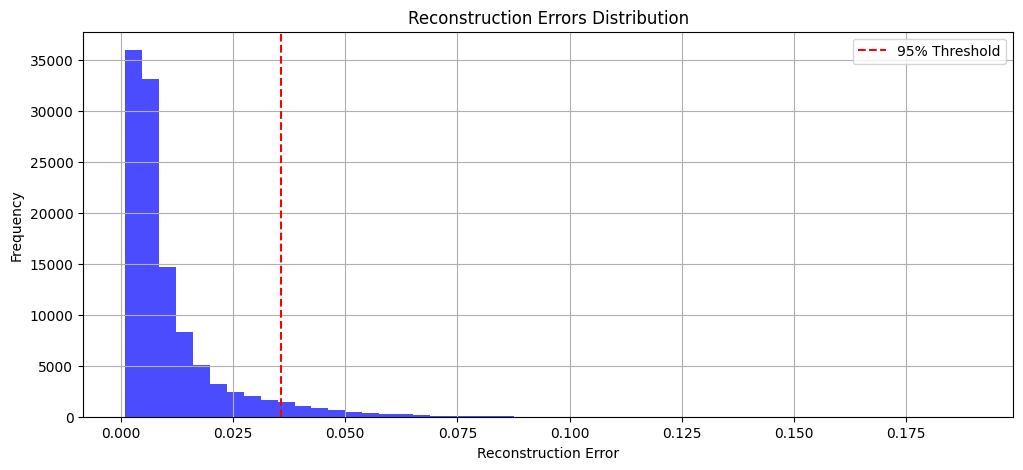

⚠️ Anomalies Detected: 5618 instances


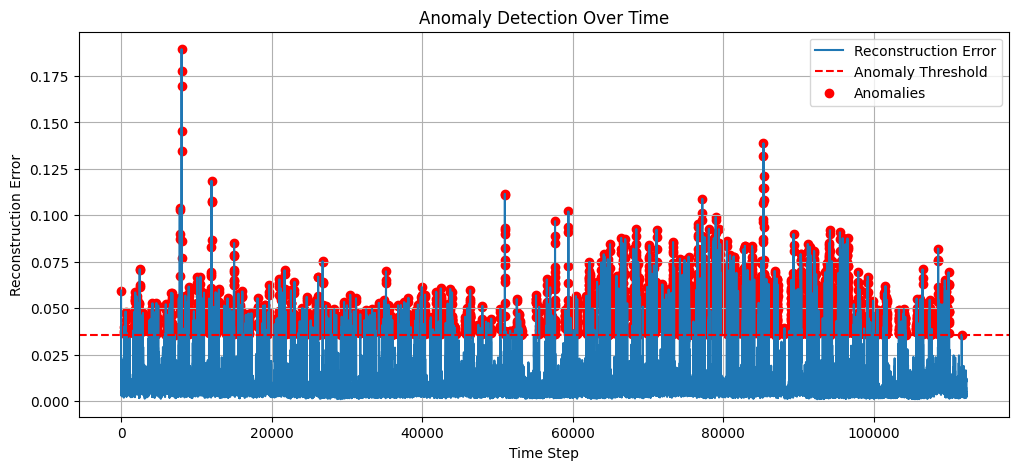

In [12]:
# Predict & Evaluate Model

# Load the trained model
model = load_model("energy_anomaly_detector.keras")
print(" Model Loaded!")

# Load & Normalize Data (if not already in session)
energy_cols = ["total_hvac", "total_lighting", "total_mels"]
scaler = MinMaxScaler()
merged_df[energy_cols] = scaler.fit_transform(merged_df[energy_cols])

# Define Time Window
time_steps = 8

def create_sequences(data, time_steps):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps])
    return np.array(X)

# Prepare test data
X_test = create_sequences(merged_df[energy_cols].values, time_steps)

print(f" Test Data Shape: {X_test.shape}")

# Make Predictions
X_pred = model.predict(X_test)

# Compute Reconstruction Error (MAE)
reconstruction_errors = np.mean(np.abs(X_test - X_pred), axis=(1, 2))

# Plot Reconstruction Errors
plt.figure(figsize=(12, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, color="blue")
plt.axvline(np.percentile(reconstruction_errors, 95), color="red", linestyle="dashed", label="95% Threshold")
plt.title("Reconstruction Errors Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Identify Anomalies
threshold = np.percentile(reconstruction_errors, 95)  # Top 5% as anomalies
anomalies = reconstruction_errors > threshold
anomalies_indices = np.where(anomalies)[0]

print(f" Anomalies Detected: {len(anomalies_indices)} instances")

# Visualize Anomalies Over Time
plt.figure(figsize=(12, 5))
plt.plot(reconstruction_errors, label="Reconstruction Error")
plt.axhline(threshold, color="red", linestyle="dashed", label="Anomaly Threshold")
plt.scatter(anomalies_indices, reconstruction_errors[anomalies_indices], color="red", label="Anomalies")
plt.title("Anomaly Detection Over Time")
plt.xlabel("Time Step")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.show()